### DRF (Django Rest Framework)

DRF is a framework built on top of Django and is used to create REST APIs quickly.

#### MVT Architecture

Both DRF and Django follow this architecture to create APIs and Backend.
- Model
- View
- Templates

#### Model:
Model is also called as data layer and it is used to manage data and interact with the database.

#### View:
Also known as the logic layer and acts as an intermediate stage between model and templates. It handles main logic and manage data Flow.

#### Templates:
Also known as the presentation layer and it renders HTML content on the user interface.

## Model usage:
Django models utilize a powerful feature called Object-Relational Mapping (ORM), which bridges the gap between a relational database and Python code. It converts the Python objects (classes) into database tables, their attributes into columns, and instances into rows within those tables.

One huge advantage of the ORM is that it allows you to interact with the database using Python objects instead of writing SQL queries. Think of it as a translator that converts one language into another for an audience to understand. In this case, the ORM translates Python code into SQL commands that the database can execute, and vice versa.

### **Note**:
Django models encapsulate all database-related logic and define the structure of your database, acting as a blueprint for the data you want to store. [Source](https://www.freecodecamp.org/news/how-django-mvt-architecture-works/)

## View usage
Django views are responsible for processing user requests and returning responses. They act as the bridge between the Model and the Template by collecting data from Model objects, performing logical operations on them (such as queries based on certain criteria), and then passing the data to the template for display.

### **Note**:
Views can be written as functions or class-based, depending on the complexity and requirements of your application.

## Template Usage
Django templates are responsible for rendering the final HTML output on the browser. They define how data should be presented, by using a combination of HTML and Django’s templating language.

### **Note**:
Django templating language involves using template tags {% %} and template variables {{ }} that allow you to enter Django mode in your HTML template. In this mode, you can access variables defined in your Views and use control structures within your template.

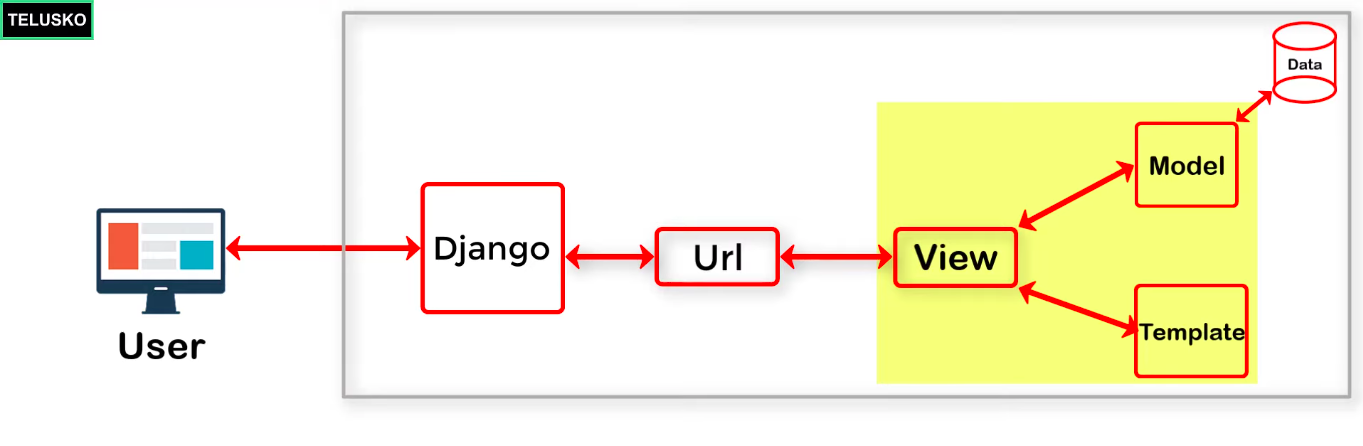


### Why Serializer?

It is used to convert the **_model instances_** to python native data types and then convert them into JSON.

### Serialization Process
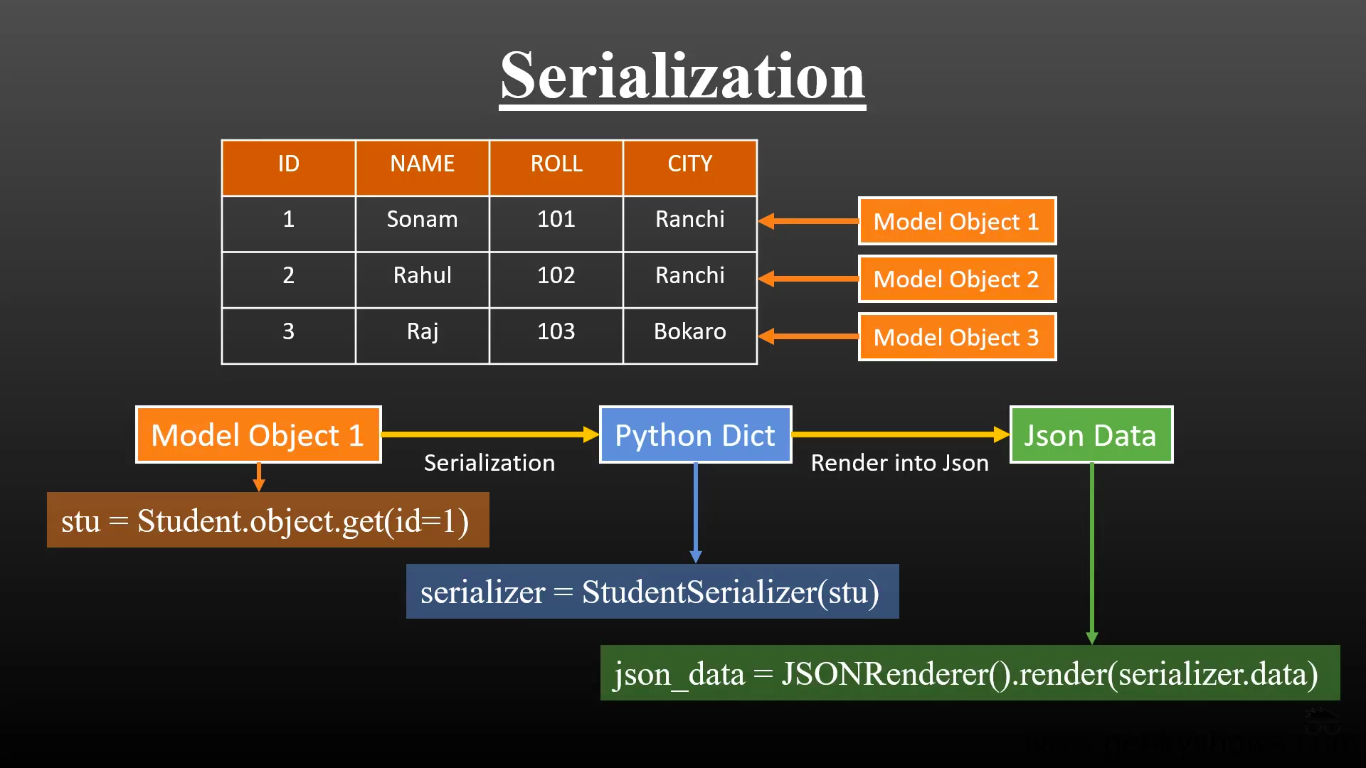

### De-serialization Process
This process is the reverse of Serialization.
- Use the IO module to convert the JSON data into IO byte stream. <br>`import io`<br>`stream = io.BytesIO(json_data)`
- Now, convert the JSON data into python native datatype using: <br>`from rest_framework.parsers import JSONParser`<br>`parsed_data = JSONParser().parse(stream)`
- Now, actual de-serialization process starts by converting the parsed data into native data type.
- First create serializer object.<br>`serializer = StudentSerializer(data=parsed_data)`
- Now, validate the converted serializer using: <br>`serializer.is_valid()`<br>Validated data: `serializer.validated_data`<br>error: `serializer.error`
- To create the model object now we will include another method in `StudentSerializer` class as:<br>
```
from rest_framework import serializers
class StudentSerializer(serializers.Serializer):
    name = serializers.CharField(max_length=100)
    roll = serializers.IntegerField()
    city = serializers.CharField(max_length=100)

    def create(self, validated_data):
        Student.objects.create(**validated_data)
```
- Include the following view after creating it into `urls.py`:
```
import io
from django.http import HttpResponse
from django.views.decorators.csrf import csrf_exempt
from rest_framework.parsers import JSONParser
from rest_framework.renderers import JSONRenderer
from .serializers import StudentSerializer

# Create your views here.

@csrf_exempt
def student_create(request):
    if request.method == 'POST':
        json_data = request.body
        stream = io.BytesIO(json_data)
        python_data = JSONParser().parse(stream)
        serializer = StudentSerializer(data=python_data)
        if serializer.is_valid():
            serializer.save()
            msg = {
                'res': 'Data Stored'
            }
            json_data = JSONRenderer().render(msg)
            return HttpResponse(json_data, content_type='application/json')
        json_data = JSONRenderer().render(serializer.errors)
        return HttpResponse(json_data, content_type='application/json')
```
- What is CSRF?
CSRF, or Cross-Site Request Forgery, is a type of web security vulnerability that allows an attacker to induce users to perform actions they don't intend to, by tricking their web browser into submitting malicious requests to a website where the user is already authenticated.

### Updating Data(Partial and Full):
To update the data, we can use the following method which is quite similar to create, just a few params that we need to take care of.
```
from rest_framework import serializers
class StudentSerializer(serializers.Serializer):
    name = serializers.CharField(max_length=100)
    roll = serializers.IntegerField()
    city = serializers.CharField(max_length=100)

    def update(self, instance, validated_data):
        instance.name = validated_data.get('name', instance.name)
        instance.roll = validated_data.get('roll', instance.roll)
        instance.city = validated_data.get('city', instance.city)
        instance.save()
        return instance
```

**Note:** By Default, serializers require all the parameters to be passed else they will raise an error. For partial update, we can use the following parameter:
<br>`serializer = StudentSerializer(stu, data=pythonData, parital=True)`

stateless vs statefull, REST vs other architectures
<br>django request life cycle
<br>